# **Handwritten digits recognition (using Multilayer Perceptron)**

#### **Student Name:** Daniel Giedraitis 

#### **Student Number:** C00260331

#### **Module:** Data Science and Machine Learning 2 - Y4

In this notebook, I aim to develop a comprehensive understanding of Multilayer Perceptron (MLP) models using TensorFlow for recognizing handwritten digits by making changes to this [notebook](https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb).
A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

## **Change Log:**

### **Change 1:**

#### **Results:**
**Hidden Layers: 128 Units:**
- Training Accuracy: 99.33%
- Training Loss: 0.0191
- Test Accuracy: 97.79%
- Test Loss: 0.0925


**Hidden Layers: 64 Units:**
- Training Accuracy: 99.22%
- Training Loss: 0.0250
- Test Accuracy: 97.21%
- Test Loss: 0.1045

<br>

- Both models achieve very high training and test accuracies, indicating good generalization.
- The model with 128 units in hidden layers slightly outperforms the one with 64 units in terms of both training and test accuracy.
- However, the model with 64 units in hidden layers has slightly higher training loss and test loss compared to the model with 128 units, suggesting a slightly worse fit to the training data and potentially a slightly higher tendency to overfit.

### **Change 2:**

#### **Results:**
**Learning Rate: 0.001**

**Epoch 1/10:**

- Training Accuracy: 88.15%
- Training Loss: 0.3982
- Validation Accuracy: 96.38%
- Validation Loss: 0.1179

**Epoch 10/10:**

- Training Accuracy: 99.32%
- Training Loss: 0.0196
- Validation Accuracy: 97.79%
- Validation Loss: 0.0925

**Test Accuracy: 97.79%**

**Test Loss: 0.0925**

<br>

**Learning Rate: 0.01**

**Epoch 1/10:**

- Training Accuracy: 88.30%
- Training Loss: 0.3782
- Validation Accuracy: 93.67%
- Validation Loss: 0.2276

**Epoch 10/10:**

- Training Accuracy: 97.35%
- Training Loss: 0.1074
- Validation Accuracy: 96.42%
- Validation Loss: 0.1756

**Test Accuracy: 96.42%**

**Test Loss: 0.1756**

<br>

- In this scenario, a learning rate of 0.001 appears to be more suitable, offering better convergence and generalization performance.
- Fine-tuning the learning rate within a smaller range (e.g., 0.0001 to 0.01) could potentially reveal an even better-performing value.
- It's essential to balance the need for fast convergence with the risk of overshooting or poor generalization when selecting the learning rate for training neural networks.
 

### **Change 3:**
Increasing the number of training epochs from 10 to 20 to allow the model more time to learn complex patterns in the data.
#### **Results:**
**10 Epochs:**

- Training Accuracy: 99.34%
- Training Loss: 0.0191
- Validation Accuracy: 97.79%
- Validation Loss:  0.0925

**20 Epochs:**

- Training Accuracy: 99.85%
- Training Loss: 0.0039
- Validation Accuracy: 97.59%
- Validation Loss: 0.1164

<br>

- Increasing the number of epochs from 10 to 20 leads to a significant improvement in training accuracy from 99.34% to 99.85%.
- However, the test accuracy slightly decreases from 97.79% to 97.59%.
- The decrease in test accuracy indicates potential overfitting. The model might have learned to classify the training data too well and lost its ability to generalize to unseen data.
- The training loss decreases substantially from 0.0191 to 0.0039, indicating that the model fits the training data almost perfectly after 20 epochs.
- The test loss increases from 0.0925 to 0.1164, confirming the model's overfitting behavior.

### **Change 4:**
Adding a L2 regularization with a weight decay of 0.001 to the model
#### **Results:**
**Without Weight Decay:**

- Training Accuracy: 99.34%
- Training Loss: 0.0191
- Validation Accuracy: 97.79%
- Validation Loss:  0.0925

**With Weight Decay (0.001):**

- Training Accuracy: 99.57%
- Training Loss: 0.0130
- Validation Accuracy: 97.56%
- Validation Loss: 0.0973

<br>

- Introducing weight decay with a coefficient of 0.001 slightly improves the training accuracy from 99.34% to 99.57%.
- The training loss decreases from 0.0191 to 0.0130 with the addition of weight decay, indicating that the regularization helps prevent overfitting by reducing the complexity of the model.
- However, the test accuracy decreases slightly from 97.79% to 97.56% with the addition of weight decay.
- The test loss also increases slightly from 0.0925 to 0.0973, indicating a slight reduction in the model's ability to generalize to unseen data.

### **Change 5:**
Increasing the number of epochs from 10 to 20 and adding L2 regularization with a weight decay coefficient of 0.001.
#### **Results:**
**Code before (10 epochs without weight decay):**

- Training accuracy: 99.34%
- Test accuracy: 97.79%

**Code with 20 epochs and weight decay of 0.001:**

- Training accuracy: 99.74%
- Test accuracy: 97.99%

<br>
With the additional regularization and increased training epochs, the model's performance has improved slightly. The training accuracy has increased from 99.34% to 99.74%, and the test accuracy has increased from 97.79% to 97.99%. This indicates that the model is generalizing slightly better to unseen data. Therefore, keeping these changes in the code would likely result in improved accuracy.

## **Import Dependencies:**

Begin by importing the required libraries for developing and training the MLP model. These include TensorFlow for machine learning operations, Matplotlib for data visualization, NumPy for numerical operations, and datetime for generating log folder names.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import datetime

## **Load the Data:**

Load the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## **Data Exploration:**

To understand the data, we display a sample of images from the dataset along with their corresponding labels.

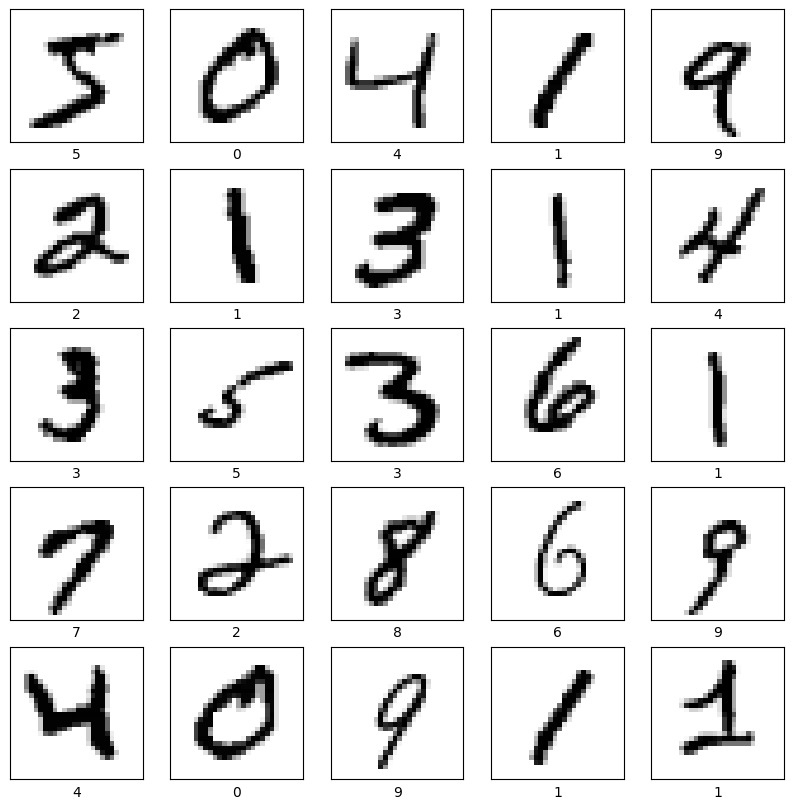

In [3]:
# Display sample images
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


## **Normalization:**

We normalize the pixel values of the images to the range [0, 1] to facilitate training.

In [4]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0


## **Model Development:**

We build a Multilayer Perceptron (MLP) model using TensorFlow with the following architecture:
1. Flatten layer that will flatten image 2D matrix into 1D vector.
2. Input Dense layer with 128 neurons and ReLU activation.
3. Hidden Dense layer with 128 neurons and ReLU activation.
4. Output Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

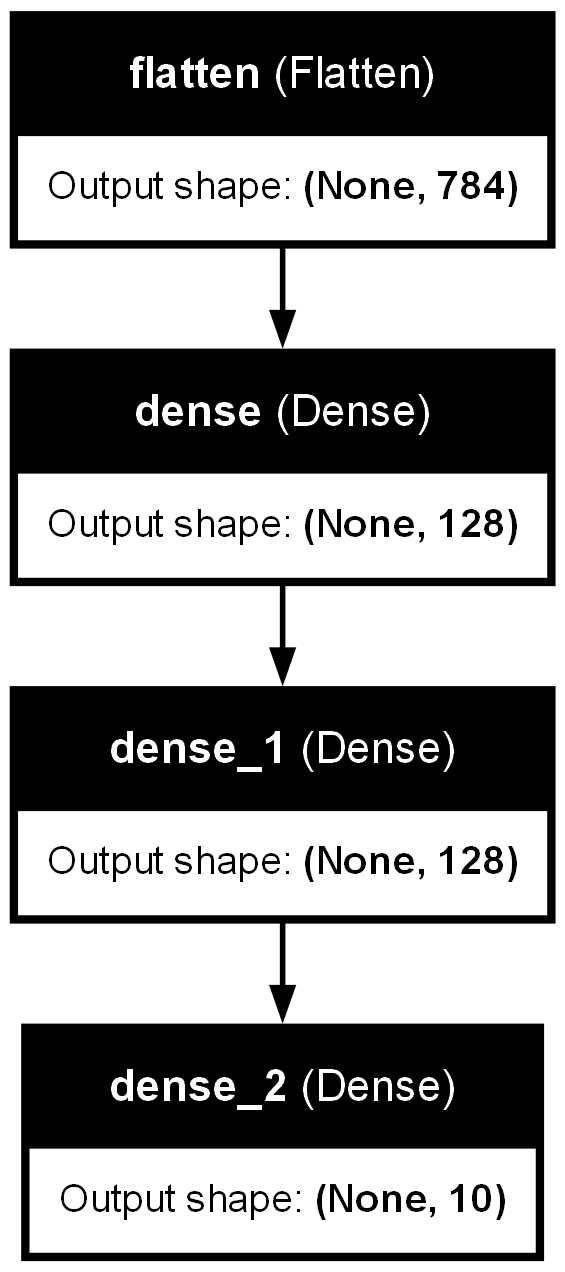

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train_normalized.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

model.summary()

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## **Model Compilation:**

We compile the model with appropriate loss function, optimizer, and evaluation metrics.

In [6]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


## **Model Training:**

We train the model on the normalized training data and evaluate its performance on the test data.

In [7]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=20,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8860 - loss: 0.4038 - val_accuracy: 0.9572 - val_loss: 0.1306
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9684 - loss: 0.1014 - val_accuracy: 0.9689 - val_loss: 0.0961
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9797 - loss: 0.0648 - val_accuracy: 0.9764 - val_loss: 0.0764
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9845 - loss: 0.0476 - val_accuracy: 0.9727 - val_loss: 0.0870
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9746 - val_loss: 0.0855
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0267 - val_accuracy: 0.9783 - val_loss: 0.0765
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9766 - val_loss: 0.0885
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9934 - loss: 0.0203 - 

## **Training Analysis:**

We analyze the training and validation loss/accuracy trends to assess model performance and identify potential issues such as overfitting or underfitting.

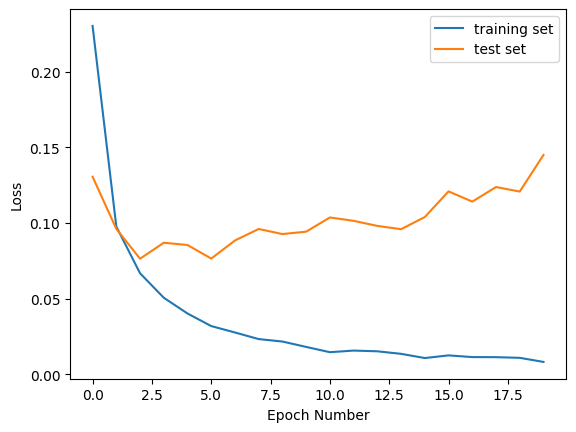

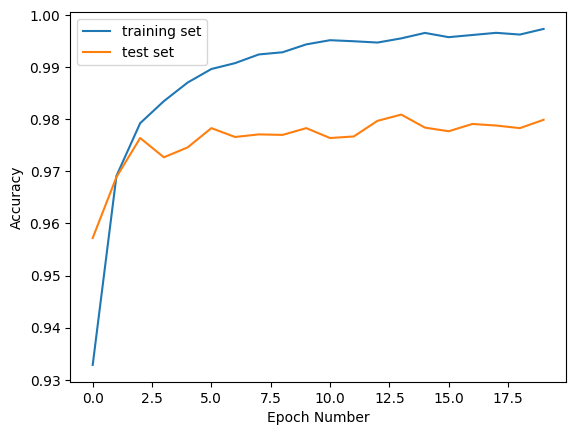

In [8]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()
plt.show()

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()
plt.show()


## **Model Evaluation:**

We evaluate the model's accuracy on both the training and test sets to assess its generalization performance.

In [9]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9973 - loss: 0.0086
Training loss:  0.008350064978003502
Training accuracy:  0.9974166750907898
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1873
Test loss:  0.1449759155511856
Test accuracy:  0.9799000024795532


## **Conclusion:**

In this notebook, we developed and trained a Multilayer Perceptron (MLP) model using TensorFlow for handwritten digit recognition. By analyzing the training and validation metrics, we evaluated the model's performance and assessed its generalization capability. Further experimentation and optimization may be performed to improve the model's accuracy and efficiency.